<a href="https://colab.research.google.com/github/jindalritu/my_machineLearning/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [ ]:
train_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data_Train.xlsx',parse_dates=['Date_of_Journey'])
test_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Test_set.xlsx',parse_dates=['Date_of_Journey'])
pd.set_option('display.max_columns',None)


In [ ]:
train_df.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test_df.head(5)
test_df['Airline'].value_counts()
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           No

In [ ]:
train_df['Duration'].value_counts()
test_df['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
40h 40m      1
20h 25m      1
32h 5m       1
19h 15m      1
7h 25m       1
Name: Duration, Length: 320, dtype: int64

In [ ]:
train_df.dropna( inplace=True)
train_df.isnull().sum()
test_df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
### Another way of doing preprocessing for columns 

#train_df['Journey1'] = train_df['Date_of_Journey'].astype('str').str.split('-').str[2]
#train_df['Journey1']

#train_df['Duration'] = train_df['Duration'].str.split(' ').str[1]
#train_df['Duration'].str.split('m').str[0]


In [ ]:
train_df.shape


(10682, 11)

In [ ]:

test_df.shape

(2671, 10)

In [ ]:
train_df['journey_day'] = train_df['Date_of_Journey'].dt.day
train_df['journey_month'] = train_df['Date_of_Journey'].dt.month

test_df['journey_day'] = test_df['Date_of_Journey'].dt.day
test_df['journey_month'] = test_df['Date_of_Journey'].dt.month

In [ ]:
train_df.head()
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [ ]:
train_df.drop('Date_of_Journey',axis=1,inplace=True)
test_df.drop('Date_of_Journey',axis=1,inplace=True)


In [ ]:
train_df.head(5)
test_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [ ]:
train_df['Dep_hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_minute'] = pd.to_datetime(train_df['Dep_Time']).dt.minute
test_df['Dep_hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_minute'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

In [ ]:
train_df.drop('Dep_Time',axis=1,inplace=True)
test_df.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
train_df.head(5)
test_df.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [ ]:
train_df['Arrival_hour'] = pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_minute'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute
test_df['Arrival_hour'] = pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_minute'] = pd.to_datetime(test_df['Arrival_Time']).dt.minute

In [ ]:
train_df.drop('Arrival_Time',axis=1,inplace=True)
test_df.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
train_df.head(5)
test_df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [ ]:
# converting Duration columns into duration_hr and duration_minute

In [ ]:
duration = list(train_df['Duration'])
duration
for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if 'h' in duration[i]:
      duration[i] = duration[i] + '0m'
      
    else:
      duration[i] = '0h' + duration[i] 
      #print(duration[i])
  #print(duration[i])
duration_hr=[]
duration_min=[]
for i in range(len(duration)):
  duration_hr.append(int(duration[i].split(sep='h')[0]))
  duration_min.append(int(duration[i].split(sep='m')[0].split('h')[-1]))

#print(duration_hr)
#print(duration_min)
train_df['duration_hr'] = duration_hr
train_df['duration_min'] = duration_min




In [ ]:
duration1 = list(test_df['Duration'])
duration1
for i in range(len(duration1)):
  if len(duration1[i].split()) != 2:
    if 'h' in duration1[i]:
      duration1[i] = duration1[i] + '0m'
      
    else:
      duration1[i] = '0h' + duration1[i] 
      #print(duration[i])
  #print(duration[i])
duration_hr=[]
duration_min=[]
for i in range(len(duration1)):
  duration_hr.append(int(duration1[i].split(sep='h')[0]))
  duration_min.append(int(duration1[i].split(sep='m')[0].split('h')[-1]))

#print(duration_hr)
#print(duration_min)
test_df['duration_hr'] = duration_hr
test_df['duration_min'] = duration_min


In [ ]:
train_df.drop('Duration',axis=1,inplace=True)
train_df.head(5)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [ ]:
test_df.drop('Duration',axis=1,inplace=True)
test_df.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hr,duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [ ]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
#airline = pd.get_dummies(train_df[['Airline']],drop_first=True)
train_df['Airline'] = pd.factorize(train_df['Airline'])[0]
test_df['Airline'] = pd.factorize(test_df['Airline'])[0]



In [ ]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
source = pd.get_dummies(train_df[['Source']],drop_first = True)
source.head(5)
'''
l1 = OneHotEncoder(sparse=False,handle_unknown='ignore')
source = l1.fit_transform(train_df[['Source']])
d = pd.DataFrame(source,index=train_df.index,columns=l1.categories_[0])
d.head(5)
new_df = train_df.join(d)
new_df
'''

"\nl1 = OneHotEncoder(sparse=False,handle_unknown='ignore')\nsource = l1.fit_transform(train_df[['Source']])\nd = pd.DataFrame(source,index=train_df.index,columns=l1.categories_[0])\nd.head(5)\nnew_df = train_df.join(d)\nnew_df\n"

In [ ]:
#airline1 = pd.get_dummies(test_df[['Airline']],drop_first=True)
source1 = pd.get_dummies(test_df[['Source']],drop_first=True)
destination1 = pd.get_dummies(test_df[['Destination']],drop_first=True)



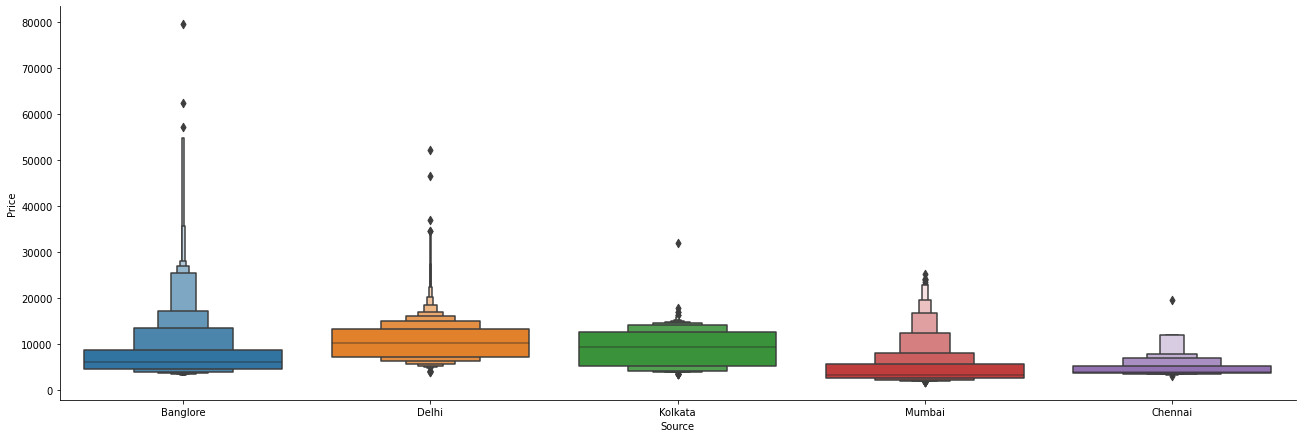

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='Source',y='Price',data = train_df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [ ]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
destination = pd.get_dummies(train_df[['Destination']],drop_first=True)

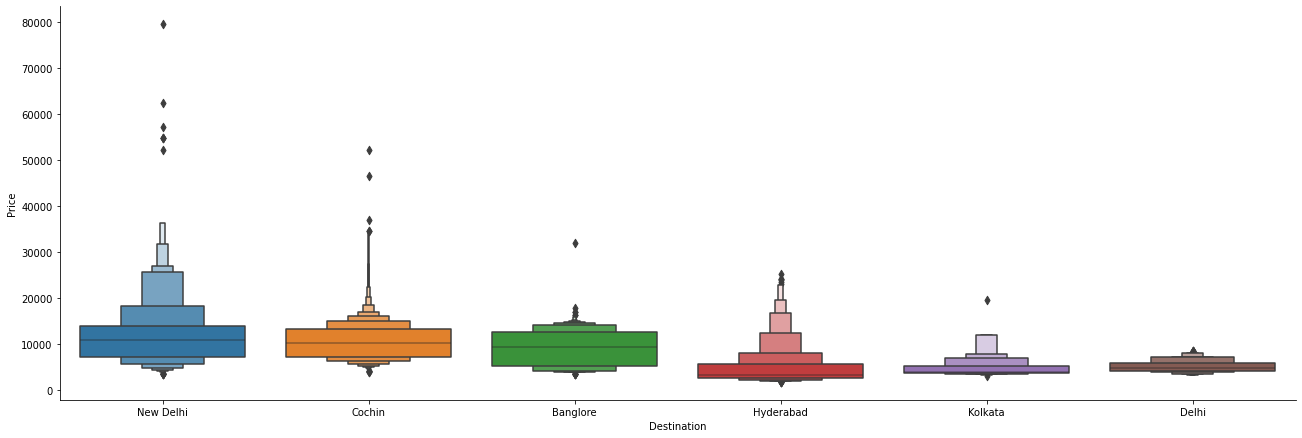

In [ ]:
sns.catplot(x='Destination',y='Price',data=train_df.sort_values('Price',ascending=False),kind = 'boxen',height=6,aspect=3)
plt.show()

In [ ]:
train_df['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → RPR → VTZ → HYD                   1
BOM → COK → MAA → HYD                   1
BOM → JDH → JAI → DEL → HYD             1
BLR → CCU → BBI → HYD → VGA → DEL       1
BLR → HBX → BOM → BHO → DEL             1
Name: Route, Length: 128, dtype: int64

In [ ]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
train_df.drop(['Route','Additional_Info'],axis=1,inplace=True)
test_df.drop(['Route','Additional_Info'],axis=1,inplace=True)


In [ ]:
train_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
test_df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_df.head(5)
test_df.head(5)

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hr,duration_min
0,0,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,1,Kolkata,Banglore,1,5,12,6,20,10,20,4,0
2,0,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,2,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,3,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [ ]:
data_train=pd.concat([train_df,source,destination],axis=1)


data_test = pd.concat([test_df,source1,destination1],axis=1)


In [ ]:
data_train.drop(['Source','Destination'],axis=1,inplace=True)
data_test.drop(['Source','Destination'],axis=1,inplace=True)


In [ ]:
data_train.info()

#data_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Airline                10682 non-null  int64
 1   Total_Stops            10682 non-null  int64
 2   Price                  10682 non-null  int64
 3   journey_day            10682 non-null  int64
 4   journey_month          10682 non-null  int64
 5   Dep_hour               10682 non-null  int64
 6   Dep_minute             10682 non-null  int64
 7   Arrival_hour           10682 non-null  int64
 8   Arrival_minute         10682 non-null  int64
 9   duration_hr            10682 non-null  int64
 10  duration_min           10682 non-null  int64
 11  Source_Chennai         10682 non-null  uint8
 12  Source_Delhi           10682 non-null  uint8
 13  Source_Kolkata         10682 non-null  uint8
 14  Source_Mumbai          10682 non-null  uint8
 15  Destination_Cochin     10682 non-nul

In [ ]:
y = data_train.Price

data = pd.concat([data_train.drop(['Price'],axis=1),data_test])
data.info()
#data_test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Airline                13353 non-null  int64
 1   Total_Stops            13353 non-null  int64
 2   journey_day            13353 non-null  int64
 3   journey_month          13353 non-null  int64
 4   Dep_hour               13353 non-null  int64
 5   Dep_minute             13353 non-null  int64
 6   Arrival_hour           13353 non-null  int64
 7   Arrival_minute         13353 non-null  int64
 8   duration_hr            13353 non-null  int64
 9   duration_min           13353 non-null  int64
 10  Source_Chennai         13353 non-null  uint8
 11  Source_Delhi           13353 non-null  uint8
 12  Source_Kolkata         13353 non-null  uint8
 13  Source_Mumbai          13353 non-null  uint8
 14  Destination_Cochin     13353 non-null  uint8
 15  Destination_Delhi      13353 non-null

In [ ]:
data.shape

#y.shape




#from sklearn.model_selection import train_test_split
#X= data_train.drop(['Price'],axis=1)
#y=data_train['Price']

(13353, 19)

In [ ]:

train1 = data[0:10682]
test1 = data[10682:]
X = train1
y = data_train.Price

X.shape

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)


(10682, 19)

In [ ]:
#y.shape
from sklearn.ensemble import RandomForestRegressor
rd = RandomForestRegressor()
rd.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = rd.predict(test1)
pred

array([ 6095.27      ,  8113.236     ,  7302.33      , ...,
       13609.44      , 13652.95      , 11514.36066667])

In [ ]:
#pred_test = rd.predict(data_test)
#pred_test
accuracy = rd.score(X,y)
accuracy

0.9465415696531972

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
rd.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rd.predict(X_test)
y_pred

array([16750.33      ,  6127.85      ,  8926.79      , ...,
        6894.35      , 12769.43116667, 13160.59983333])

In [ ]:
rd.score(X_test,y_test)


0.7852884470819531

In [ ]:
features1 = pd.Series(rd.feature_importances_,index = train1.columns)
features1

Airline                  0.163998
Total_Stops              0.033167
journey_day              0.131518
journey_month            0.066584
Dep_hour                 0.029616
Dep_minute               0.027140
Arrival_hour             0.034286
Arrival_minute           0.022645
duration_hr              0.445710
duration_min             0.024632
Source_Chennai           0.000660
Source_Delhi             0.002478
Source_Kolkata           0.007021
Source_Mumbai            0.001341
Destination_Cochin       0.002436
Destination_Delhi        0.000253
Destination_Hyderabad    0.001319
Destination_Kolkata      0.000573
Destination_New Delhi    0.004621
dtype: float64

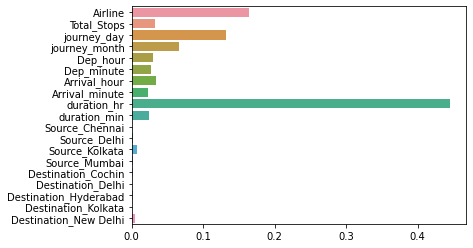

In [ ]:
#good for classification problem
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=features,y = features1.index)
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
random_grid ={
    'n_estimators': [int(x) for x in np.linspace(100,1200,num=12)],
    'max_features': ['auto','sqrt'],
    'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
    'min_samples_split':[2,5,10,15],
    'min_samples_leaf':[1,2,5,10]
}
cv = RandomizedSearchCV(estimator = rd,param_distributions = random_grid,cv=5,verbose=2,n_iter=50,random_state = 40)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30, total=   4.7s
[CV] n_estimators=300, min_samples_split=2, min_sa

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 26.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
cv.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
cv.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 800}

In [ ]:
y_pred = cv.predict(X_test)
y_pred

array([16597.19880885,  6184.703547  ,  8625.30980144, ...,
        6921.95116214, 12211.14640928, 12490.00002301])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


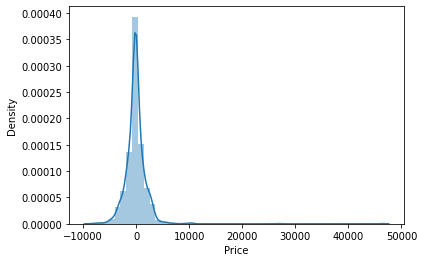

In [ ]:
sns.distplot(y_test-y_pred)

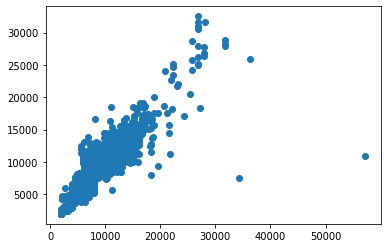

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import datasets
df_iris = datasets.load_iris()

In [ ]:
features = df_iris.data[:,:2]
labels = df_iris['target']
type(features)
type(labels)

numpy.ndarray

In [ ]:
df1 = pd.DataFrame(target)
df1.value_counts()

2    50
1    50
0    50
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,stratify = labels)
df_xtrain = pd.DataFrame(X_train)
df_xtrain[0].value_counts()

5.0    9
6.3    9
5.7    8
5.1    7
6.4    7
6.1    6
6.7    5
5.5    5
6.5    5
4.9    5
5.6    5
6.0    5
4.8    5
7.7    4
4.6    3
4.4    3
5.2    3
5.9    3
7.2    3
5.8    3
5.4    3
4.7    2
6.8    2
6.2    2
4.5    1
6.9    1
7.9    1
7.3    1
4.3    1
7.1    1
6.6    1
7.0    1
Name: 0, dtype: int64

In [ ]:
df_ytrain = pd.DataFrame(y_train)
df_ytrain.value_counts()

2    40
1    40
0    40
dtype: int64